In [37]:
# Import the models
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import hvplot.pandas

In [10]:
df = pd.read_csv("media prediction and its cost.csv")

In [31]:
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [33]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 60428 rows and 40 columns


In [43]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [29]:
customers_df = df.groupby("food_department").agg({"food_department":"count"})
customers_df

,food_department
food_department,
Alcoholic Beverages,1590
Baked Goods,1797
Baking Goods,4497
Beverages,3014
Breakfast Foods,778
Canned Foods,4238
Canned Products,400
Carousel,225
Checkout,385


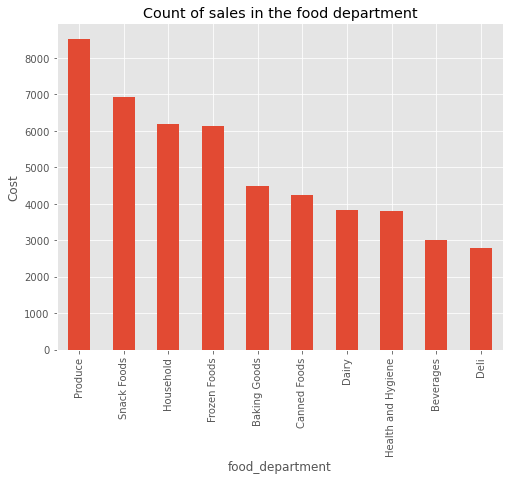

In [56]:
plt.style.use('ggplot')

df.value_counts('food_department')

plt.figure(figsize = (8,6))
df.groupby('food_department')['food_department'].count()\
    .sort_values(ascending = False)\
    .head(10)\
    .plot(kind = 'bar')
plt.ylabel('Cost')
plt.title('Count of sales in the food department')
plt.show()

In [44]:
customers_df = df.groupby("food_category").agg({"food_category":"count"})
customers_df

,food_category
food_category,
Baking Goods,1947
Bathroom Products,1552
Beer and Wine,1590
Bread,1797
Breakfast Foods,1946
Candles,195
Candy,1538
Canned Anchovies,213
Canned Clams,199


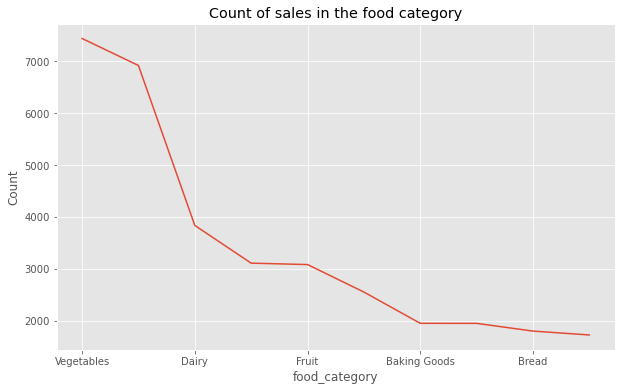

In [59]:
plt.style.use('ggplot')

df.value_counts('food_category')

plt.figure(figsize = (10,6))
df.groupby('food_category')['food_category'].count()\
    .sort_values(ascending = False)\
    .head(10)\
    .plot(kind = 'line')
plt.ylabel('Count')
plt.title('Count of sales in the food category')
plt.show()

In [46]:
customers_df = df.groupby("gender").agg({"gender":"count"})
customers_df

,gender
gender,
F,30942
M,29486


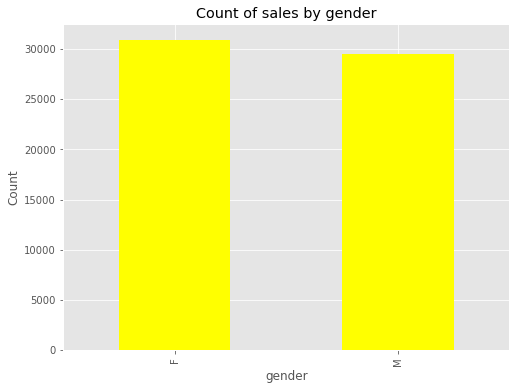

In [71]:
plt.style.use('ggplot')

df.value_counts('gender')

plt.figure(figsize = (8,6))
df.groupby('gender')['gender'].count()\
    .sort_values(ascending = False)\
    .head(10)\
    .plot(kind = 'bar', color = 'yellow')
plt.ylabel('Count')
plt.title('Count of sales by gender')
plt.show()

In [47]:
customers_df = df.groupby("promotion_name").agg({"promotion_name":"count"})
customers_df

,promotion_name
promotion_name,
Bag Stuffers,1066
Best Savings,868
Big Promo,1172
Big Time Discounts,1480
Big Time Savings,745
Bye Bye Baby,874
Cash Register Lottery,1555
Coupon Spectacular,402
Dimes Off,1150


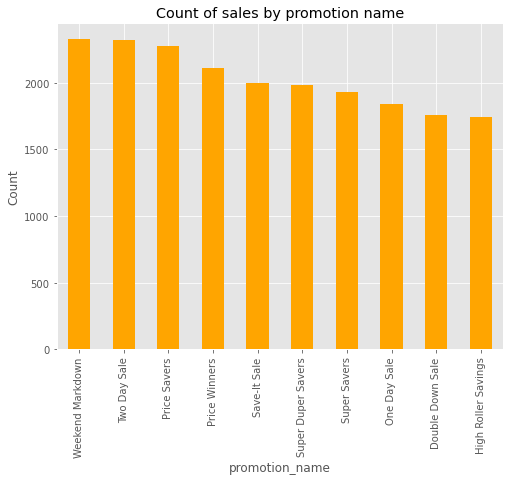

In [70]:
plt.style.use('ggplot')

df.value_counts('promotion_name')

plt.figure(figsize = (8,6))
df.groupby('promotion_name')['promotion_name'].count()\
    .sort_values(ascending = False)\
    .head(10)\
    .plot(kind = 'bar', color = 'orange')
plt.ylabel('Count')
plt.title('Count of sales by promotion name')
plt.show()

In [48]:
customers_df = df.groupby("sales_country").agg({"sales_country":"count"})
customers_df

,sales_country
sales_country,
Canada,3964
Mexico,17572
USA,38892


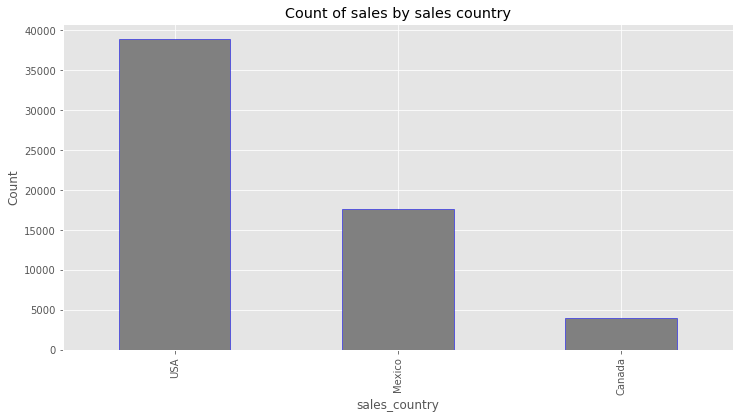

In [69]:
plt.style.use('ggplot')

df.value_counts('sales_country')

plt.figure(figsize = (12,6))
df.groupby('sales_country')['sales_country'].count()\
    .sort_values(ascending = False)\
    .head(10)\
    .plot(kind = 'bar', edgecolor = 'blue', color = 'grey')\

plt.ylabel('Count')
plt.title('Count of sales by sales country')
plt.show()

In [49]:
df.isna().sum() #No nulls

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [50]:
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
